In [4]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
from sklearn.datasets import load_breast_cancer

In [5]:
# ---------------------------------------------------------------
# DATOS
# ---------------------------------------------------------------

breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

In [6]:
# ---------------------------------------------------------------
# FUNCIÓN DE COMPILAR Y ENTRENAR
# ---------------------------------------------------------------

def compile_fit(capas, x, y, epochs, activation):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    model = Sequential()
    for index, neuronas_capa in enumerate(capas):
        if index == 0:
            model.add(Dense(neuronas_capa, activation=activation, input_dim=x.shape[1]))
        elif index == len(capas) - 1:
            model.add(Dense(neuronas_capa, activation='linear'))
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss='mean_squared_error')

    inicio = time.time()
    history = model.fit(x, y, epochs=epochs, verbose=False)
    fin = time.time()
    tiempo = round(fin - inicio, 2)

    return model, history, tiempo

In [7]:
# ---------------------------------------------------------------
# DEFINICIÓN DE LAS REDES
# ---------------------------------------------------------------

redes_neuronales = [
    [[20, 1], "relu"],
    [[20, 1], "selu"],
    [[20, 1], "tanh"],
    [[20, 10, 1], "relu"],
    [[20, 10, 1], "selu"],
    [[20, 10, 1], "tanh"],
    [[20, 30, 10, 1], "relu"],
    [[20, 30, 10, 1], "selu"],
    [[20, 30, 10, 1], "tanh"],
    [[20, 40, 80, 40, 20, 1], "relu"],
    [[20, 40, 80, 40, 20, 1], "selu"],
    [[20, 40, 80, 40, 20, 1], "tanh"],
    [[20, 40, 80, 160, 80, 40, 20, 1], "relu"],
    [[20, 40, 80, 160, 80, 40, 20, 1], "selu"],
    [[20, 40, 80, 160, 80, 40, 20, 1], "tanh"]
]                        

c:\Users\aleja\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


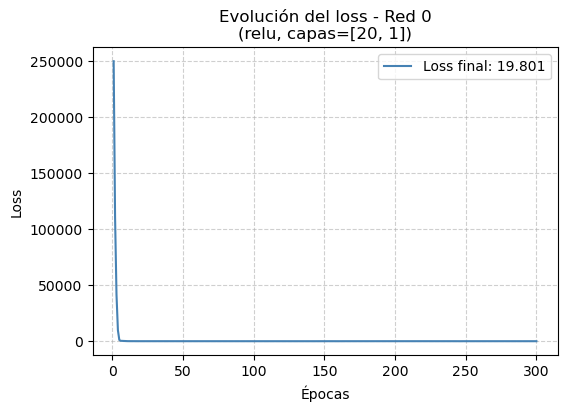

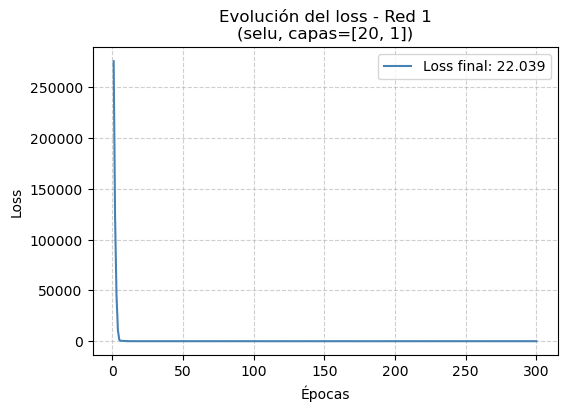

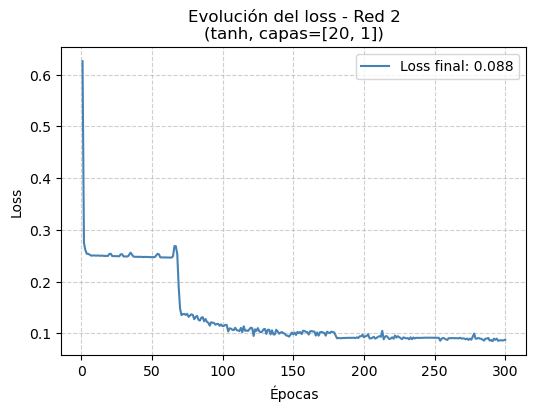

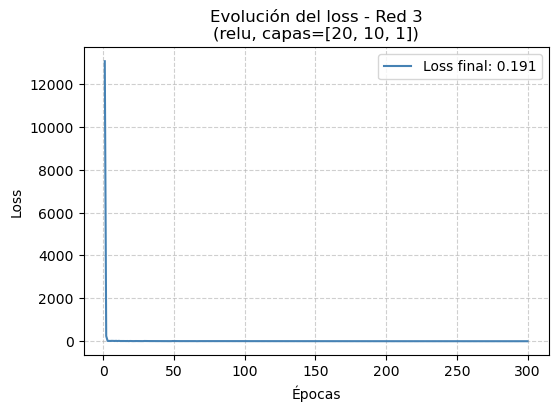

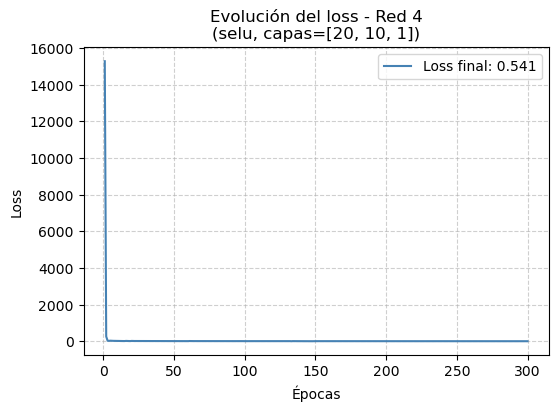

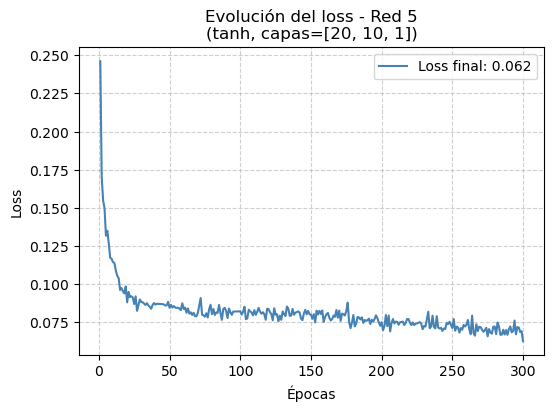

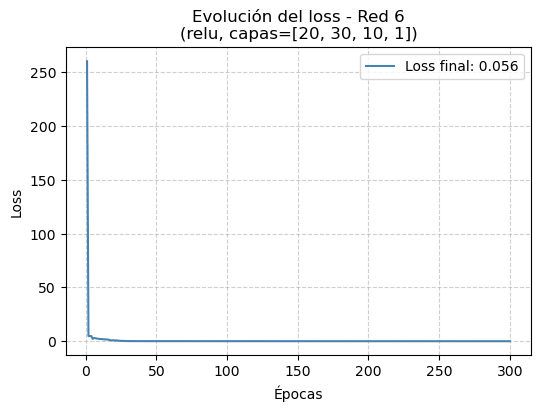

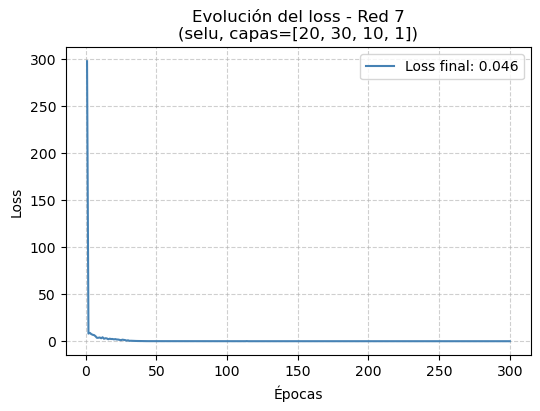

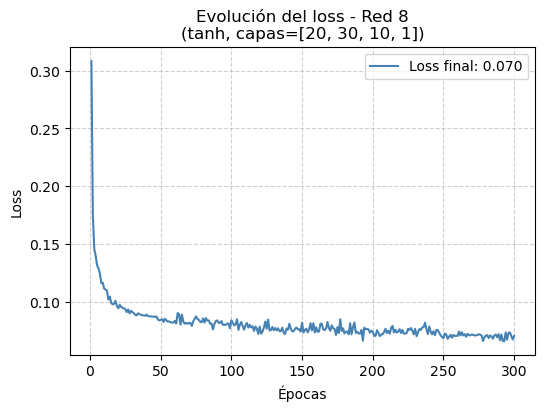

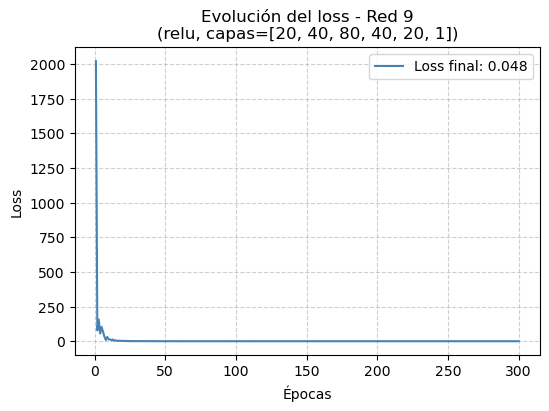

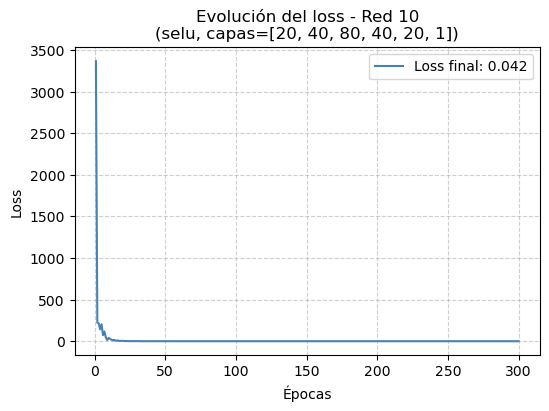

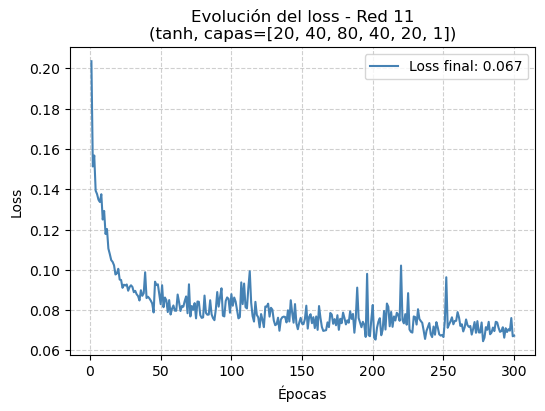

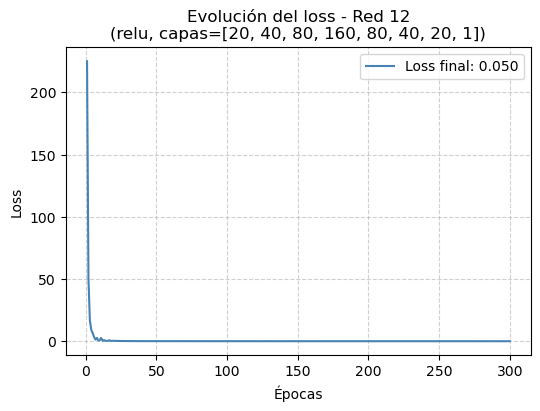

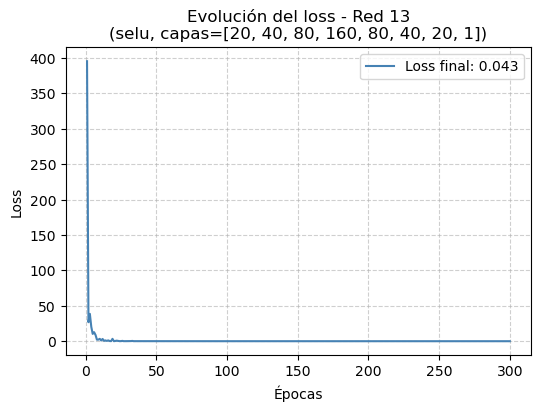

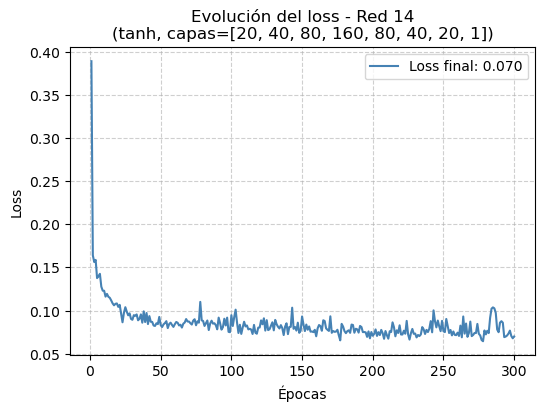

In [8]:
# ---------------------------------------------------------------
# ENTRENAMIENTO DE TODAS LAS REDES
# ---------------------------------------------------------------

epochs = 300
resultados = []
loss_por_red = []

for i, (capas, activacion) in enumerate(redes_neuronales):
    model, history, tiempo = compile_fit(capas, x, y, epochs, activacion)

    resultados.append([i, capas, epochs, activacion, tiempo])

    loss = history.history['loss']
    loss_por_red.append(loss)

    loss_final = loss[-1]

    # ---------------------------------------------------------------
    # GRÁFICA INDIVIDUAL DEL LOSS
    # ---------------------------------------------------------------
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, epochs + 1), loss, color='steelblue', label=f'Loss final: {loss_final:.3f}')
    plt.title(f'Evolución del loss - Red {i}\n({activacion}, capas={capas})')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()


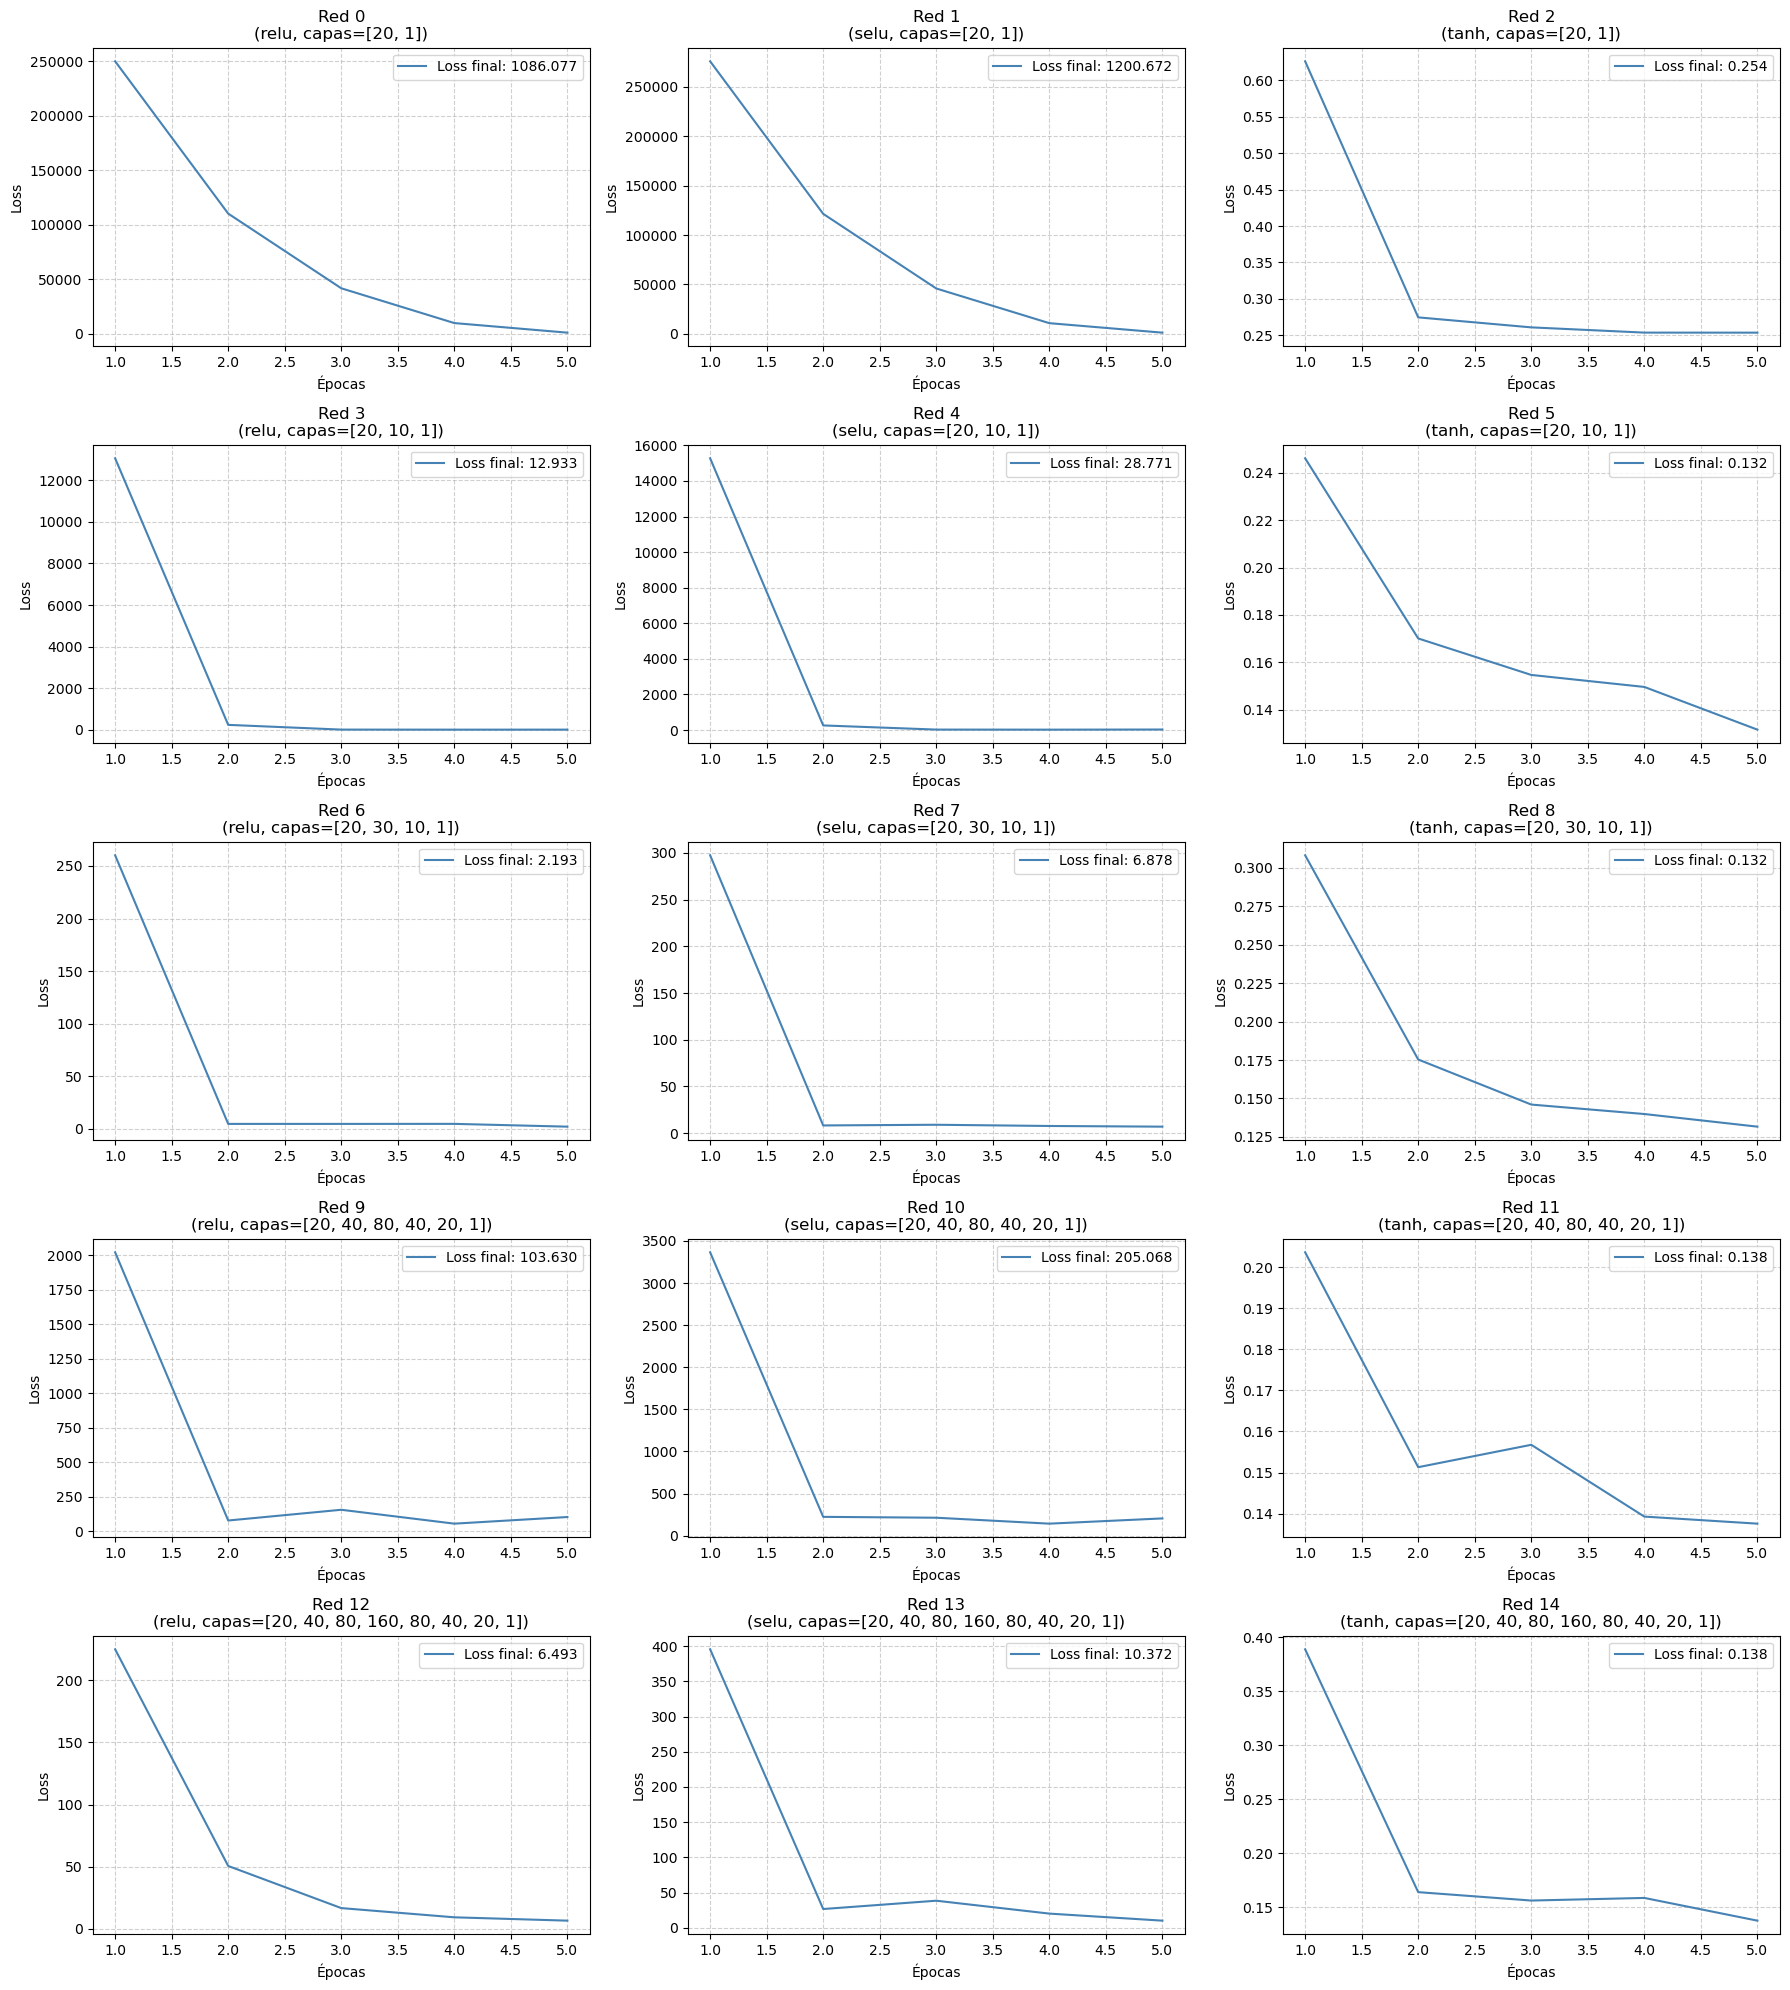

In [ ]:
import matplotlib.pyplot as plt

epochs = 5
resultados = []
loss_por_red = []

# Entrenamiento de todas las redes
for i, (capas, activacion) in enumerate(redes_neuronales):
    model, history, tiempo = compile_fit(capas, x, y, epochs, activacion)
    resultados.append([i, capas, epochs, activacion, tiempo])
    loss_por_red.append(history.history['loss'])

# Crear la figura única
total_redes = len(redes_neuronales)
n_columnas = 3
n_filas = (total_redes + n_columnas - 1) // n_columnas  # calcular número de filas necesario

plt.figure(figsize=(6 * n_columnas, 4 * n_filas))

# Dibujar todas las gráficas usando un solo for
for i in range(total_redes):
    plt.subplot(n_filas, n_columnas, i + 1)  # subplot(n_filas, n_columnas, índice)
    
    loss = loss_por_red[i]
    capas, activacion = redes_neuronales[i]
    
    plt.plot(range(1, epochs + 1), loss, color='steelblue', label=f'Loss final: {loss[-1]:.3f}')
    plt.title(f'Red {i}\n({activacion}, capas={capas})')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# ---------------------------------------------------------------
# DIVIDIR DATOS EN TRAIN Y VALIDACIÓN
# ---------------------------------------------------------------
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------------
# FUNCIÓN PARA CREAR, COMPILAR Y ENTRENAR MODELO
# ---------------------------------------------------------------

def compile_fit(capas, x_train, y_train, x_val, y_val, epochs, activation):
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)

    model = Sequential()
    for index, neuronas_capa in enumerate(capas):
        if index == 0:
            model.add(Dense(neuronas_capa, activation=activation, input_dim=x_train.shape[1]))
        elif index == len(capas) - 1:
            model.add(Dense(neuronas_capa, activation='linear'))
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    # model.compile(loss='mean_squared_error')
    model.compile(loss='binary_crossentropy')

    inicio = time.time()
    history = model.fit(x_train, y_train,validation_data=(x_val, y_val),epochs=epochs,verbose=False)
    fin = time.time()
    tiempo = round(fin - inicio, 2)

    return model, history, tiempo

# ---------------------------------------------------------------
# ENTRENAMIENTO DE TODAS LAS REDES
# ---------------------------------------------------------------
epochs = 2000
train_loss_por_red = []
val_loss_por_red = []
tiempos = []

for i, (capas, activacion) in enumerate(redes_neuronales):
    model, history, tiempo = compile_fit(capas, x_train, y_train, x_val, y_val, epochs, activacion)
    train_loss_por_red.append(history.history['loss'])
    val_loss_por_red.append(history.history['val_loss'])
    tiempos.append(tiempo)

# ---------------------------------------------------------------
# GRAFICAR TODAS LAS REDES EN UNA SOLA FIGURA
# ---------------------------------------------------------------

n_columnas = 3
total_redes = len(redes_neuronales)
n_filas = (total_redes + n_columnas - 1) // n_columnas

plt.figure(figsize=(6 * n_columnas, 4 * n_filas))

for i in range(total_redes):
    plt.subplot(n_filas, n_columnas, i + 1)
    
    # Últimos valores de pérdida
    last_train_loss = train_loss_por_red[i][-1]
    last_val_loss = val_loss_por_red[i][-1]
    
    # Graficar train loss y validation loss con la etiqueta que incluye el último valor
    plt.plot(range(1, epochs + 1), train_loss_por_red[i], 
             label=f'Train Loss: {last_train_loss:.3f}', color='steelblue')
    plt.plot(range(1, epochs + 1), val_loss_por_red[i], 
             label=f'Val Loss: {last_val_loss:.3f}', color='orange')
    
    capas, activacion = redes_neuronales[i]
    plt.title(f'Red {i}\n({activacion}, capas={capas})')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    
    # Limitar eje Y entre 0 y 1
    plt.ylim(0, 1)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()



KeyboardInterrupt: 